# **Analyzing and Forecasting Tesla (TSLA) Stock Prices: A Time Series Approach**

### **Stock Price Analysis**
Stock price analysis is a fundamental aspect of financial markets, providing investors and analysts with the tools needed to make informed decisions. Understanding how stock prices fluctuate over time allows for the identification of trends, the assessment of risk, and the prediction of future movements. This analysis is particularly valuable in today’s dynamic market environment, where stock prices are influenced by a multitude of factors, including economic indicators, company performance, and investor sentiment.

The goal of this project is to conduct an in-depth analysis of Tesla's (TSLA) stock price movements over the past year. Tesla, as a leader in the electric vehicle industry, is a highly volatile stock, making it an interesting subject for this study. By leveraging historical data, statistical tests, and predictive models, this project aims to uncover patterns in Tesla’s stock price behavior, assess its volatility, and build a regression model to forecast future prices.

### **Historical Stock Data**
Historical stock data serves as the cornerstone of financial analysis. It provides a comprehensive record of a stock’s performance over time, including key metrics such as daily closing prices, trading volumes, and returns. This data is essential for understanding the past behavior of a stock, identifying long-term trends, and making predictions about its future performance.

In this project, historical data for Tesla's stock over the past year is used to calculate daily returns, which measure the percentage change in the stock’s price from one day to the next. This analysis helps in understanding the stock’s volatility, which is a critical factor in assessing investment risk. Additionally, historical data allows for the application of statistical tests to determine whether the stock price follows a random walk or exhibits patterns that can be exploited for profit.

### **Concept of Daily Returns**
Daily returns are a vital metric in stock price analysis, representing the day-to-day changes in the price of a stock. These returns are calculated as the percentage change in the closing price of the stock from one trading day to the next. Analyzing daily returns provides insights into the stock’s short-term performance and volatility. High volatility, reflected in large daily returns, indicates greater risk and the potential for significant price swings, while low volatility suggests more stable price behavior.

In this project, daily returns are calculated for Tesla's stock over the last year. These returns are then plotted to visualize the stock’s volatility and to identify any patterns that may exist. Understanding these patterns is crucial for investors who seek to manage risk and make strategic decisions based on short-term price movements.

#### **1. Fetching Stock Data and Calculating Returns**

In [75]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and time period
stock_symbol = 'TSLA'  # Tesla's stock symbol
period = '1y'  # Time period for data collection

# Fetch the stock data
stock_data = yf.download(stock_symbol, period=period)

# Extract the closing prices
closing_prices = stock_data['Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change().dropna()  # pct_change calculates daily returns

# Print the closing prices and daily returns
print("Closing Prices:\n", closing_prices)
print("\nDaily Returns:\n", daily_returns)

[*********************100%%**********************]  1 of 1 completed

Closing Prices:
 Date
2023-08-15    232.960007
2023-08-16    225.600006
2023-08-17    219.220001
2023-08-18    215.490005
2023-08-21    231.279999
                 ...    
2024-08-09    200.000000
2024-08-12    197.490005
2024-08-13    207.830002
2024-08-14    201.380005
2024-08-15    214.830002
Name: Close, Length: 253, dtype: float64

Daily Returns:
 Date
2023-08-16   -0.031593
2023-08-17   -0.028280
2023-08-18   -0.017015
2023-08-21    0.073275
2023-08-22    0.008258
                ...   
2024-08-09    0.005834
2024-08-12   -0.012550
2024-08-13    0.052357
2024-08-14   -0.031035
2024-08-15    0.066789
Name: Close, Length: 252, dtype: float64


1. **Data Fetching:** The `yf.download()` function retrieves Tesla's stock data for the specified period.
2. **Extracting Closing Prices:** Closing prices are isolated from the downloaded data.
3. **Calculating Daily Returns:** Daily returns are computed as the percentage change in closing prices. `dropna()` removes any resulting NaN values.


#### **2. Plotting Closing Prices and Daily Returns**

Visualizing stock data is essential for understanding trends and volatility. Plotting both the closing prices and daily returns provides insights into how the stock price has changed over time and the variability of these changes.


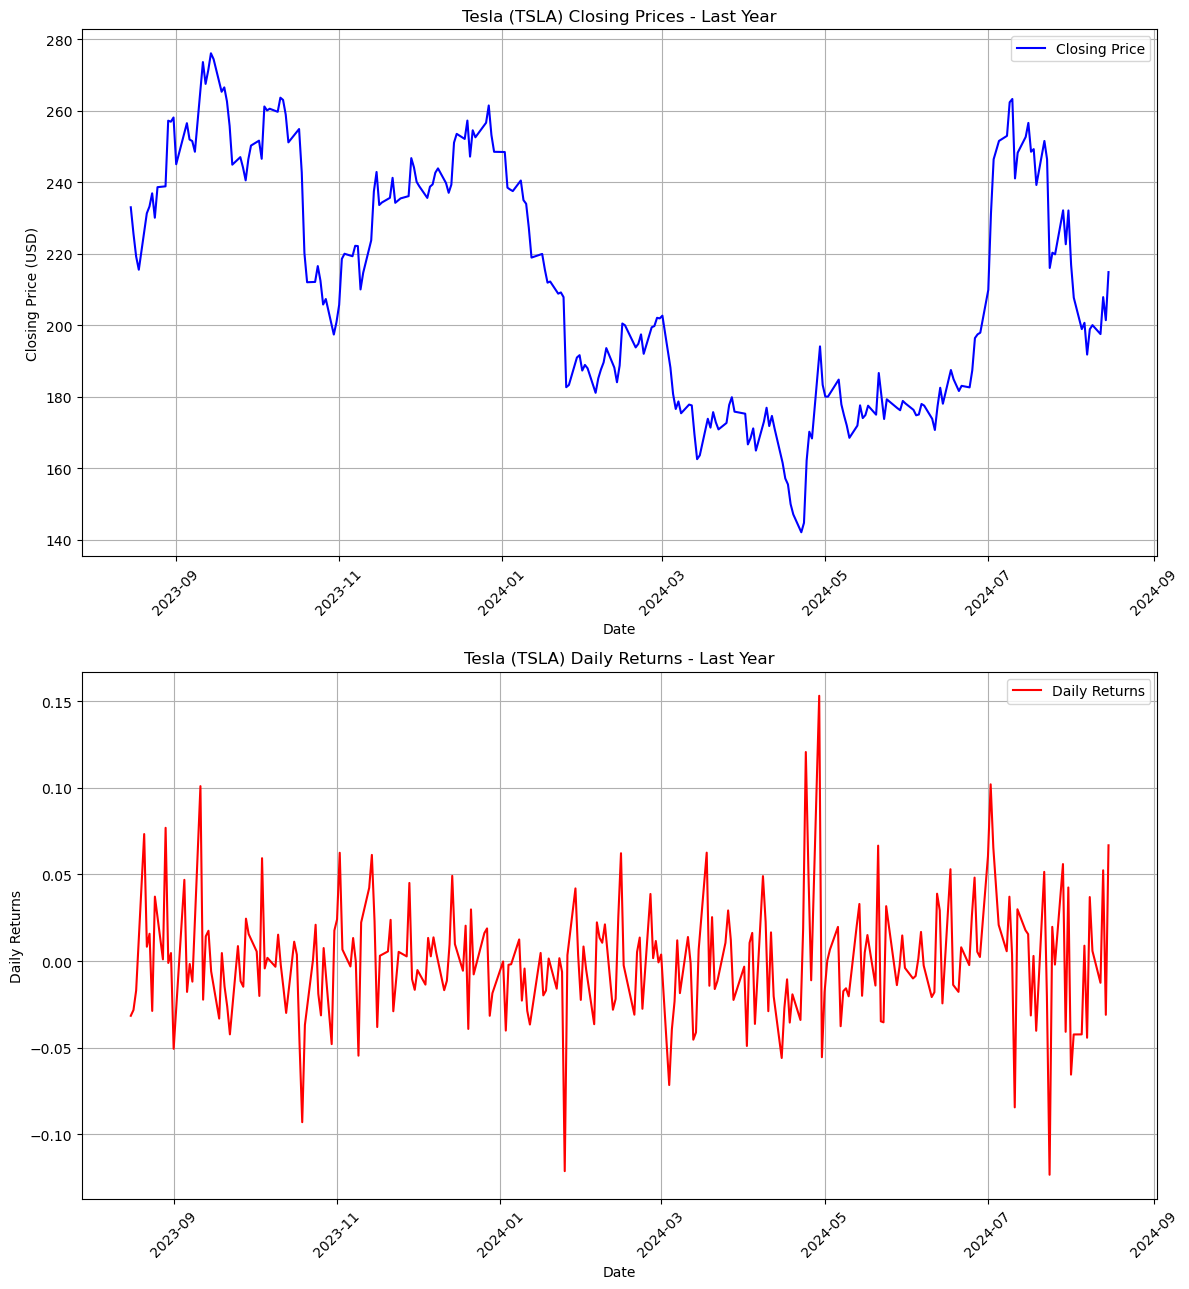

In [79]:
import matplotlib.pyplot as plt

# Plot the closing prices and daily returns
plt.figure(figsize=(12, 13))  # Adjust figure size

plt.subplot(2, 1, 1)
plt.plot(closing_prices, label='Closing Price', color='blue')
plt.title('Tesla (TSLA) Closing Prices - Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
plt.plot(daily_returns, label='Daily Returns', color='red')
plt.title('Tesla (TSLA) Daily Returns - Last Year')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. **Figure Setup:** The figure size is set to ensure the plots are clear and legible.
2. **Subplots Creation:** Two subplots are created: one for closing prices and one for daily returns.
3. **Plotting:** `plt.plot()` generates the line graphs, with appropriate labels and titles for clarity.
4. **Layout Adjustment:** `plt.tight_layout()` is used to avoid overlapping of elements.


### **Importance of Stationarity in Time Series Analysis**
Stationarity is a key concept in time series analysis, referring to a time series whose statistical properties, such as mean and variance, remain constant over time. Stationary time series are easier to model and predict, as their behavior is consistent over time. Non-stationary time series, on the other hand, can lead to misleading predictions, as their properties change over time.

In this project, the stationarity of Tesla's stock prices is tested using the Augmented Dickey-Fuller (ADF) test. If the stock prices are found to be non-stationary, techniques such as differencing will be applied to transform the data into a stationary series. This transformation is essential for building accurate predictive models and ensuring that the results of the analysis are reliable.

#### **3. Testing for Stationarity**

Stationarity is a crucial property in time series analysis. A stationary series has a constant mean, variance, and autocorrelation over time. The Augmented Dickey-Fuller (ADF) test is used to check if a series is stationary. If a series is non-stationary, differencing may be applied to achieve stationarity.


In [83]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(closing_prices.dropna())  # Drop NA values before the test

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Interpretation of the result
if adf_result[1] < 0.05:
    print("Reject the null hypothesis: The data is likely stationary.")
else:
    print("Fail to reject the null hypothesis: The data is likely non-stationary.")

ADF Statistic: -1.8044176111321277
p-value: 0.3782706884851536
Critical Values: {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}
Fail to reject the null hypothesis: The data is likely non-stationary.



1. **ADF Test Execution:** The `adfuller()` function tests for stationarity. 
2. **Results Interpretation:** The test statistic, p-value, and critical values are printed to assess stationarity. If the p-value is less than 0.05, the null hypothesis of non-stationarity is rejected, indicating that the series is likely stationary.


#### **4. First Differencing for Stationarity**

If the data is found to be non-stationary, differencing is a common technique used to make the series stationary. The first difference is computed by subtracting the previous value from the current value.


ADF Statistic (First Differenced Data): -15.800120355951053
p-value (First Differenced Data): 1.0765343753827356e-28
Critical Values (First Differenced Data): {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Reject the null hypothesis: The first differenced data is likely stationary.


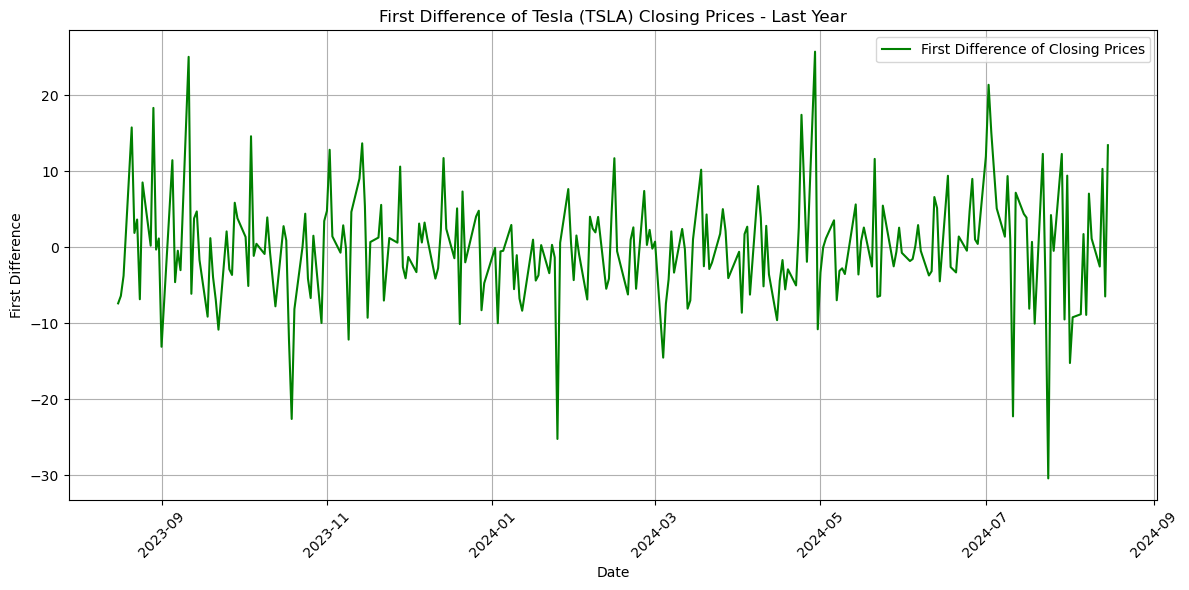

In [87]:
# Calculate the first difference
first_difference = closing_prices.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the first differenced data
adf_result_diff = adfuller(first_difference)

# Print the results
print("ADF Statistic (First Differenced Data):", adf_result_diff[0])
print("p-value (First Differenced Data):", adf_result_diff[1])
print("Critical Values (First Differenced Data):", adf_result_diff[4])

# Interpretation of the result
if adf_result_diff[1] < 0.05:
    print("Reject the null hypothesis: The first differenced data is likely stationary.")
else:
    print("Fail to reject the null hypothesis: The first differenced data is likely non-stationary.")

# Plot the first differenced data
plt.figure(figsize=(12, 6))
plt.plot(first_difference, label='First Difference of Closing Prices', color='green')
plt.title('First Difference of Tesla (TSLA) Closing Prices - Last Year')
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **First Difference Calculation:** The difference between consecutive closing prices is calculated.
2. **ADF Test on Differenced Data:** The ADF test is applied to the differenced data to check for stationarity.
3. **Plotting:** The differenced data is plotted to visualize its behavior.


### **Role of Regression Models in Stock Price Prediction**
Regression models are powerful tools for predicting stock prices based on historical data. By establishing a relationship between the dependent variable (stock price) and one or more independent variables (such as lagged stock prices), these models can provide forecasts of future stock prices. The accuracy of a regression model depends on the quality of the data and the appropriateness of the model’s assumptions.

In this project, a linear regression model is built to predict Tesla's stock prices based on lagged closing prices. The model is trained on historical data, and its performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R^2). The regression model also includes an examination of potential endogeneity errors, which occur when the independent variables are correlated with the error term, potentially leading to biased estimates.


#### **5. Building and Evaluating the Regression Model**

A regression model can help understand the relationship between current stock prices and past prices. An Ordinary Least Squares (OLS) regression model is built with the current closing price as the dependent variable and the lagged closing prices as independent variables.


Mean Squared Error: 78.26652733024488
R^2 Score: 0.9340661112027678
Intercept (Constant): 3.6412825670041684
Beta (Coefficient): 0.9853168210891433


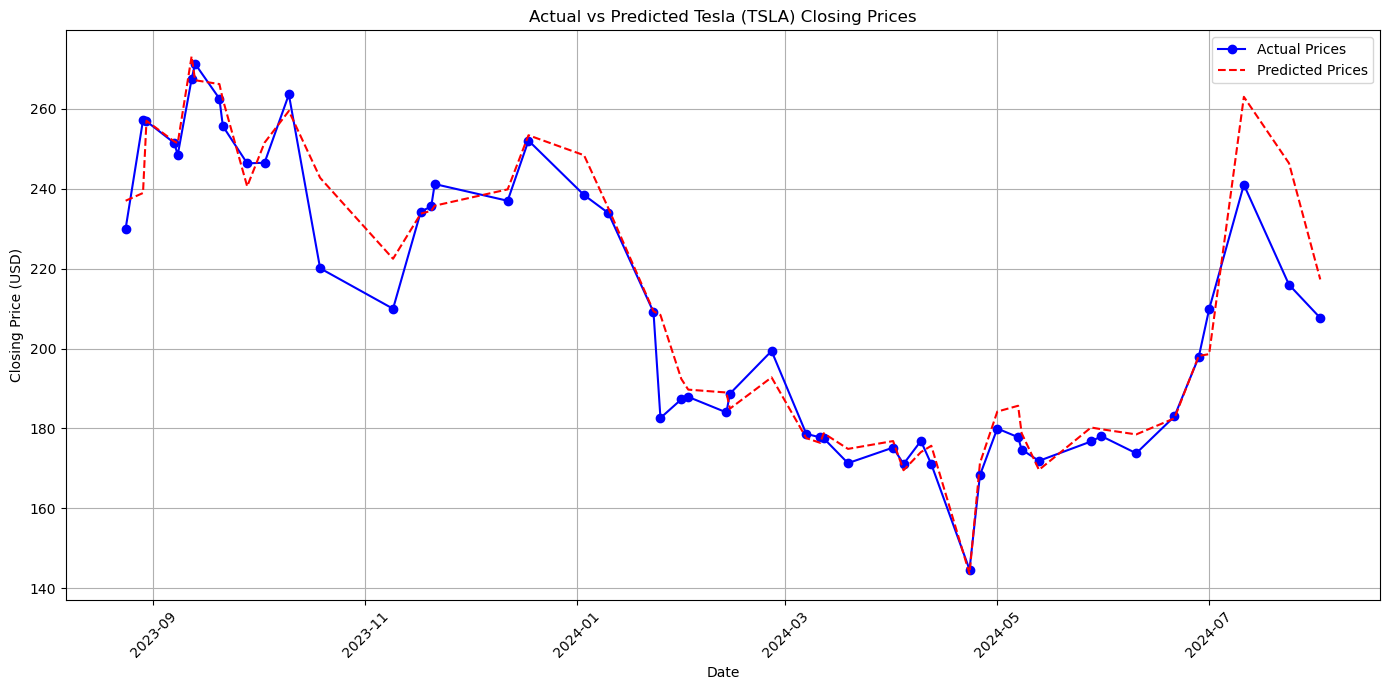

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create lagged features
data = pd.DataFrame({'Close': closing_prices})
data['Prev_Close'] = data['Close'].shift(1)  # Lagged feature
data = data.dropna()  # Drop rows with NaN values

# Define features (X) and target (y)
X = data[['Prev_Close']]
y = data['Close']

# Add a constant (intercept) term to the features
X_with_const = pd.concat([pd.Series([1] * len(X), index=X.index, name='Intercept'), X], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to align predictions with actual test data
predicted_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pd.Series(y_pred, index=y_test.index)
}).sort_index()

# Evaluate the model
mse = mean_squared_error(predicted_df['Actual'], predicted_df['Predicted'])
r2 = r2_score(predicted_df['Actual'], predicted_df['Predicted'])

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Intercept (Constant):", model.intercept_)
print("Beta (Coefficient):", model.coef_[1])  # Coefficient for Prev_Close

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(predicted_df.index, predicted_df['Actual'], label='Actual Prices', color='blue', marker='o', linestyle='-')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Tesla (TSLA) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Data Preparation:** Lagged closing prices are used as features, and the current closing price is the target.
2. **Regression Model:** A linear regression model is trained and tested. Predictions are made for the test set.
3. **Evaluation:** Mean Squared Error (MSE) and R-squared are used to assess model performance. The model’s intercept and coefficient are also displayed.
4. **Plotting:** Actual versus predicted prices are plotted to visualize model performance.



### **Endogeneity in Regression Models**
Endogeneity is a critical issue in regression models, particularly in the context of financial data. It occurs when an independent variable is correlated with the error term, which can result in biased and inconsistent parameter estimates. This can happen due to omitted variables, measurement errors, or reverse causality. Detecting and addressing endogeneity is crucial for ensuring the validity of the regression model’s results.

In this project, endogeneity is tested by examining the correlation between the residuals of the regression model and the independent variables. A significant correlation suggests the presence of endogeneity, indicating that the model may need to be adjusted to account for this issue. This step is important for improving the accuracy of the stock price predictions and for making sound investment recommendations.


#### **6. Testing for Endogeneity**

Endogeneity occurs when an independent variable is correlated with the error term in a regression model, potentially leading to biased estimates. One way to test for endogeneity is to check the correlation between residuals and independent variables.



In [95]:
# Get OLS predictions and residuals
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

# Compute the correlation between residuals and the independent variable (Prev_Close)
correlation, p_value = pearsonr(residuals, X_train['Prev_Close'])

print("Correlation between residuals and Prev_Close:", correlation)
print("P-value of the correlation:", p_value)

# Interpret the results
if abs(correlation) > 0.1 and p_value < 0.05:  # Thresholds can be adjusted
    print("The residuals are significantly correlated with Prev_Close, indicating potential endogeneity.")
else:
    print("No significant correlation between residuals and Prev_Close, indicating less concern for endogeneity.")

Correlation between residuals and Prev_Close: -1.5209188075626656e-15
P-value of the correlation: 0.9999999999999826
No significant correlation between residuals and Prev_Close, indicating less concern for endogeneity.


1. **Residual Calculation:** Residuals are computed by subtracting predictions from actual values.
2. **Correlation Test:** Pearson correlation is used to test the relationship between residuals and the independent variable.
3. **Interpretation:** Correlation and p-value are used to determine if endogeneity is a concern.



### **Assessing the Normality of Residuals**
The normality of residuals is another important aspect of regression analysis. Residuals are the differences between the observed values and the values predicted by the regression model. For the model to produce valid inferences, the residuals should be normally distributed. Non-normal residuals can indicate model misspecification, outliers, or other issues that may need to be addressed.

In this project, the normality of the residuals from the regression model is assessed using visual tools such as histograms and Q-Q plots, as well as statistical tests like the Shapiro-Wilk test. Ensuring that the residuals are normally distributed helps validate the model's assumptions and supports the reliability of the stock price predictions.

#### **7. Assessing Residuals' Normality**

Checking the normality of residuals is important to validate the assumptions of regression models. Normally distributed residuals imply that the model fits the data well and can be used for inference.


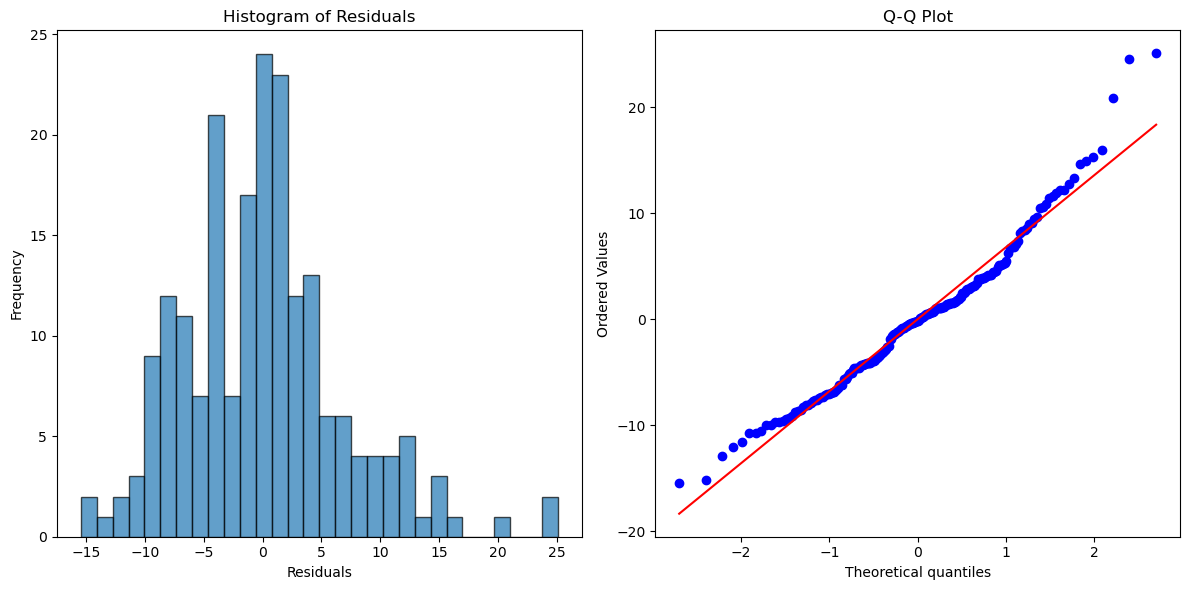

Shapiro-Wilk Test:
Statistic: 0.9697505235671997
P-value: 0.0002525302115827799


In [102]:
# Visual Inspection
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()

# Show plots
plt.show()

# Statistical Tests
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("P-value:", shapiro_test.pvalue)

1. **Histogram and Q-Q Plot:** Visual methods are used to inspect the distribution of residuals.
2. **Statistical Tests:** Shapiro-Wilk, Kolmogorov-Smirnov, and Anderson-Darling tests assess the normality of residuals quantitatively.
